In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn as slk

In [2]:
#Reading the data file and storing it in a dataframe
df=pd.read_csv("salaries.csv")

In [3]:
# Print column names
for columns in df.columns:
    print(columns)

work_year
experience_level
employment_type
job_title
salary
salary_currency
salary_in_usd
employee_residence
remote_ratio
company_location
company_size


In [4]:
#Data Types
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [5]:
#Shape of the dataframe - there are 1432 rows and 11 columns
df.shape

(1591, 11)

In [6]:
#Number of elements
df.size

17501

In [7]:
#Finding missing values per column
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
#Dropping unnecessary columns
X = df.drop(columns = ['salary', 'salary_currency'])

In [9]:
X.max(numeric_only=True)

work_year          2022
salary_in_usd    456621
remote_ratio        100
dtype: int64

In [10]:
X.min(numeric_only=True)

work_year        2020
salary_in_usd    5337
remote_ratio        0
dtype: int64

In [11]:
X.mean(numeric_only=True)

work_year          2021.470145
salary_in_usd    122265.031427
remote_ratio         70.207417
dtype: float64

In [12]:
df['salary_in_usd'].dtype

dtype('int64')

In [13]:
X.describe()

,work_year,salary_in_usd,remote_ratio
count,1591.000000,1591.000000,1591.000000
mean,2021.470145,122265.031427,70.207417
std,0.689696,61323.981042,41.000319
min,2020.000000,5337.000000,0.000000
25%,2021.000000,77376.500000,50.000000
50%,2022.000000,117164.000000,100.000000
75%,2022.000000,155000.000000,100.000000
max,2022.000000,456621.000000,100.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591 entries, 0 to 1590
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1591 non-null   int64 
 1   experience_level    1591 non-null   object
 2   employment_type     1591 non-null   object
 3   job_title           1591 non-null   object
 4   salary              1591 non-null   int64 
 5   salary_currency     1591 non-null   object
 6   salary_in_usd       1591 non-null   int64 
 7   employee_residence  1591 non-null   object
 8   remote_ratio        1591 non-null   int64 
 9   company_location    1591 non-null   object
 10  company_size        1591 non-null   object
dtypes: int64(4), object(7)
memory usage: 136.9+ KB


array([[<AxesSubplot:title={'center':'remote_ratio'}>]], dtype=object)

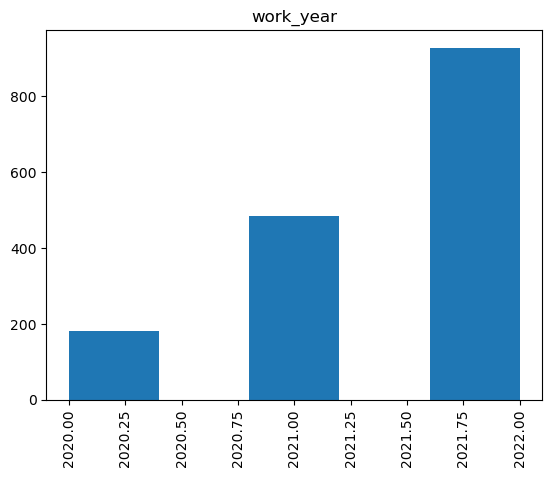

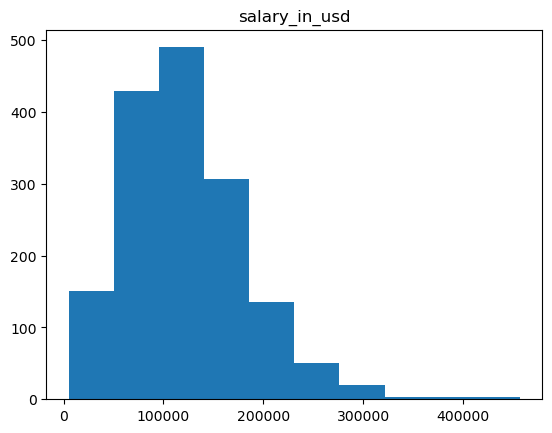

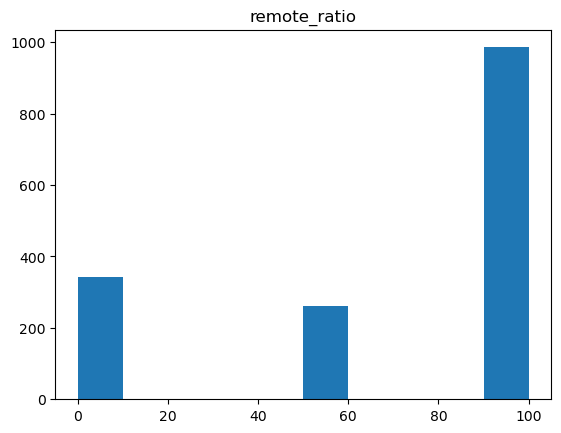

In [15]:
df.hist(column='work_year',bins=5, grid=False, xrot=90)
df.hist(column='salary_in_usd',bins=10, grid=False)
df.hist(column='remote_ratio',bins=10, grid=False)

<AxesSubplot:xlabel='Experience', ylabel='Count'>

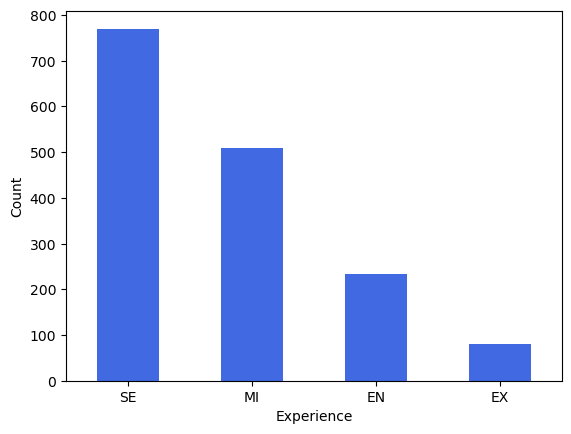

In [16]:
df['experience_level'].value_counts().plot(kind='bar', xlabel='Experience', ylabel='Count', rot=0, color="royalblue")

<AxesSubplot:xlabel='Employment Type', ylabel='Count'>

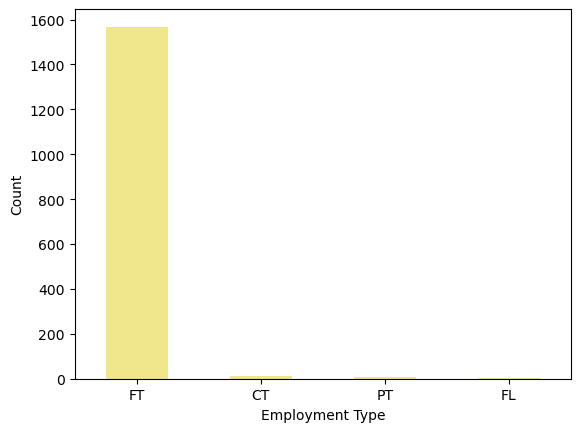

In [17]:
df['employment_type'].value_counts().plot(kind='bar', xlabel='Employment Type', ylabel='Count', rot=0, color="khaki")

<AxesSubplot:xlabel='Job Title', ylabel='Count'>

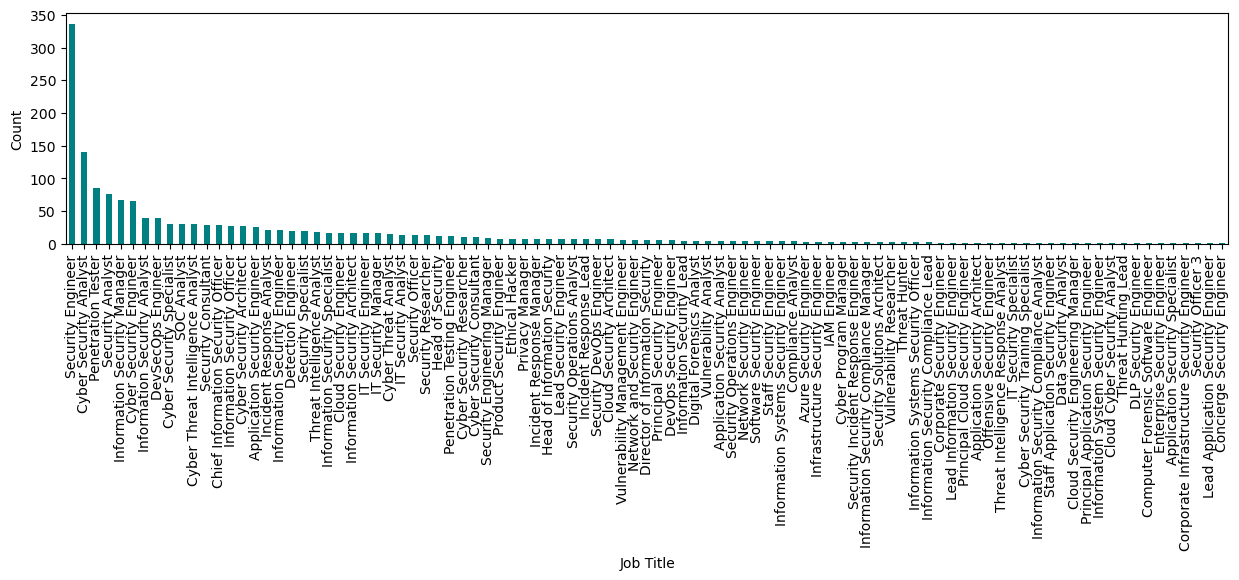

In [18]:
df['job_title'].value_counts().plot(kind='bar', xlabel='Job Title', ylabel='Count', rot=90,figsize=(15,3), color="teal")

<AxesSubplot:xlabel='Employee Residence', ylabel='Count'>

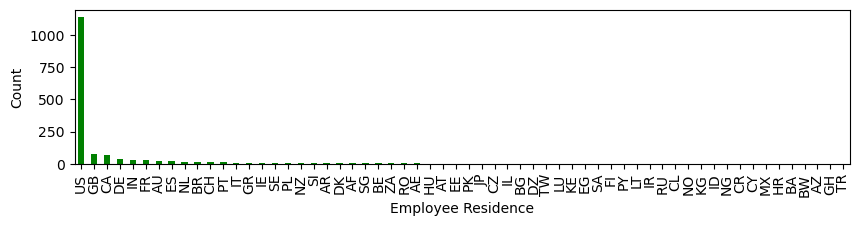

In [19]:
df['employee_residence'].value_counts().plot(kind='bar', xlabel='Employee Residence', ylabel='Count', rot=90, figsize=(10,2), color="green")

<AxesSubplot:xlabel='Company Location', ylabel='Count'>

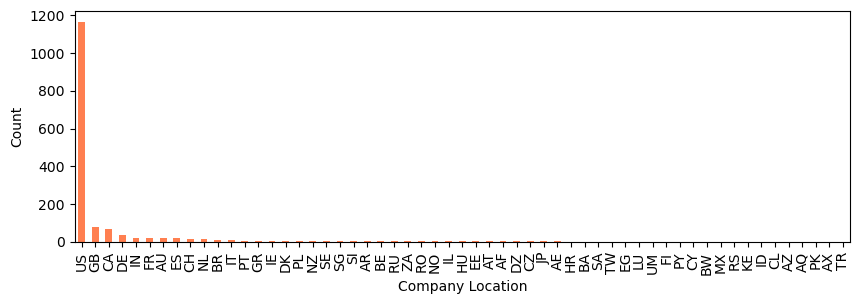

In [20]:
df['company_location'].value_counts().plot(kind='bar', xlabel='Company Location', ylabel='Count', rot=90, figsize=(10,3), color="coral")

<AxesSubplot:xlabel='Company Size', ylabel='Count'>

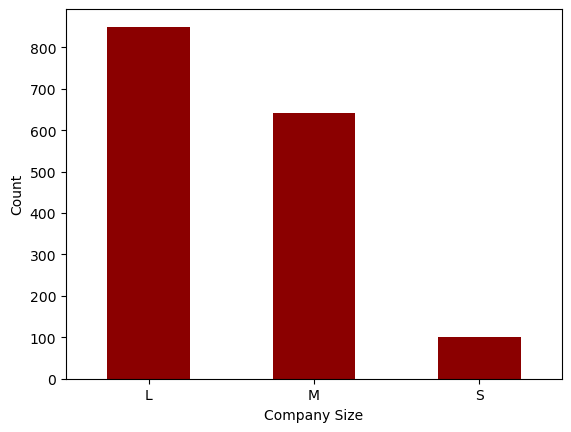

In [21]:
df['company_size'].value_counts().plot(kind='bar', xlabel='Company Size', ylabel='Count', rot=0, color="darkred")

In [22]:
df.corr()

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,0.019208,0.192385,0.067499
salary,0.019208,1.000000,-0.035149,0.016853
salary_in_usd,0.192385,-0.035149,1.000000,0.153500
remote_ratio,0.067499,0.016853,0.153500,1.000000


<AxesSubplot:xlabel='employment_type', ylabel='count'>

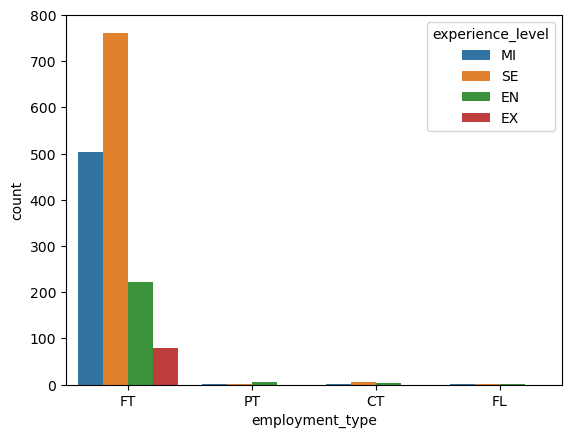

In [23]:
sns.countplot(x='employment_type', hue='experience_level', data=df)

<AxesSubplot:xlabel='company_size', ylabel='count'>

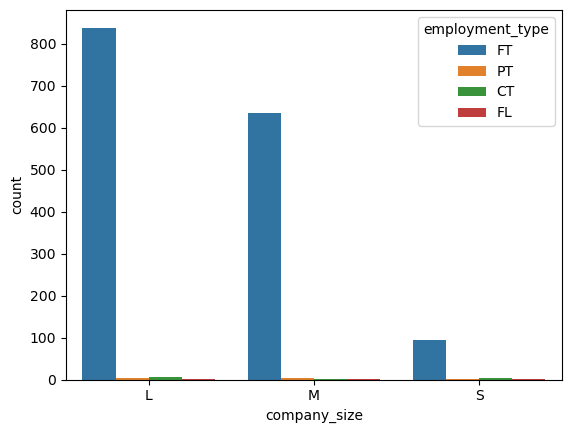

In [24]:
sns.countplot(x='company_size', hue='employment_type', data=df)

<AxesSubplot:xlabel='company_size', ylabel='count'>

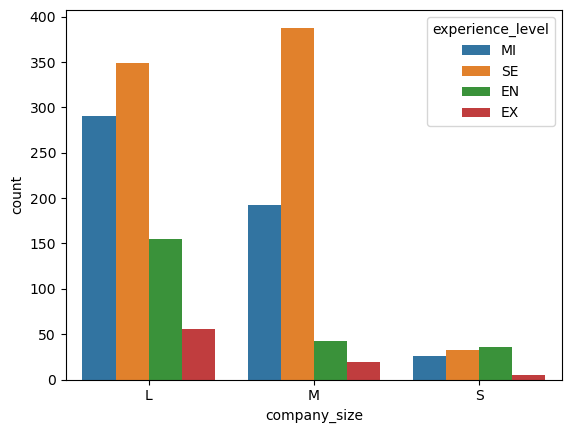

In [25]:
sns.countplot(x='company_size', hue='experience_level', data=df)

<AxesSubplot:xlabel='company_size', ylabel='salary_in_usd'>

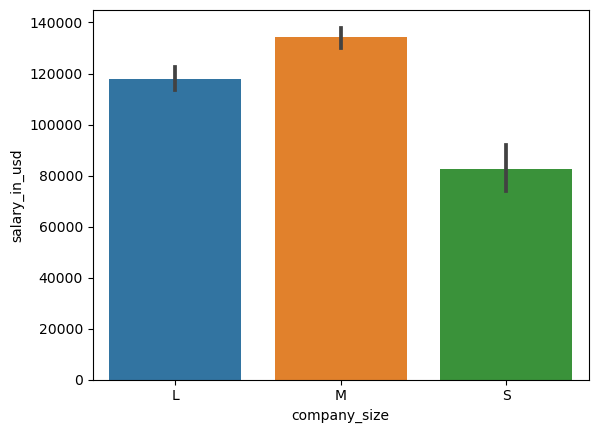

In [26]:
sns.barplot(data=df, x="company_size", y="salary_in_usd")

<AxesSubplot:xlabel='salary_in_usd', ylabel='experience_level'>

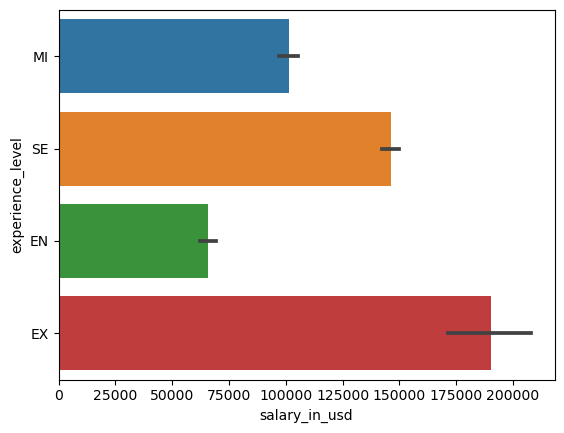

In [27]:
sns.barplot(data=df, x="salary_in_usd", y="experience_level", orient='h')

<AxesSubplot:xlabel='employment_type', ylabel='salary_in_usd'>

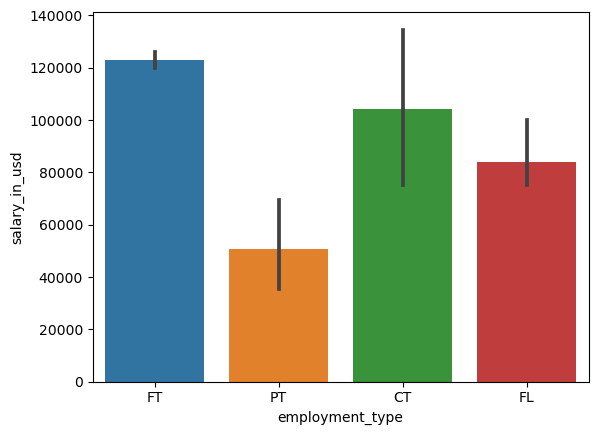

In [28]:
sns.barplot(data=df, x="employment_type", y="salary_in_usd")

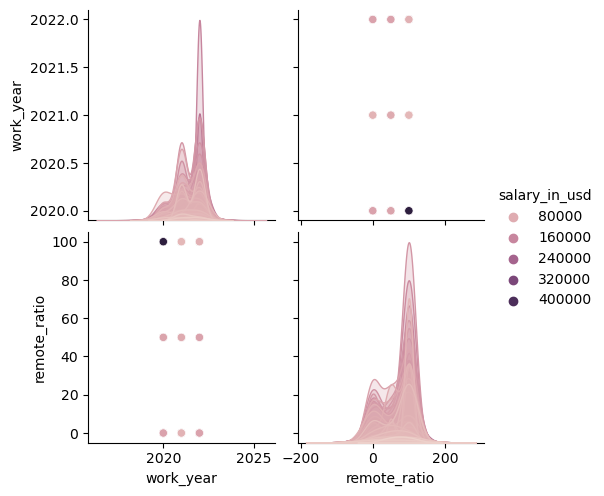

In [29]:
sns.pairplot(data=X, hue="salary_in_usd")

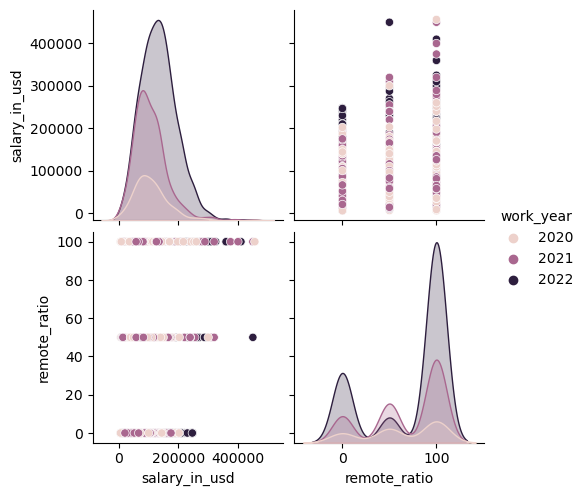

In [30]:
sns.pairplot(data=X, hue="work_year")

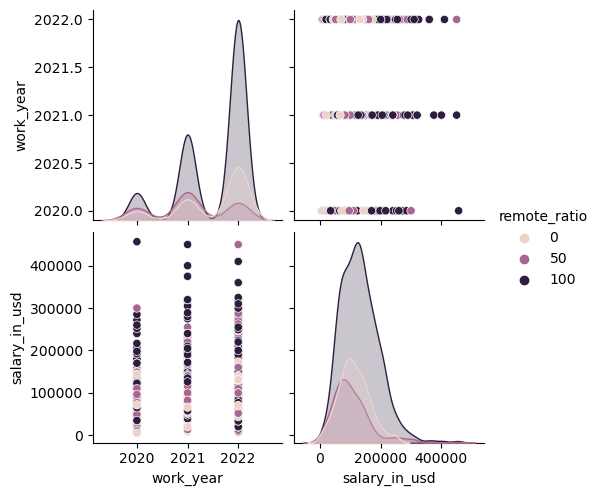

In [31]:
sns.pairplot(data=X, hue="remote_ratio")

In [41]:
from sklearn.model_selection import train_test_split

x= df [['work_year',
'experience_level',
'employment_type',
'job_title',
'employee_residence',
'remote_ratio',
'company_location',
'company_size']]

y= df ["salary_in_usd"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 0, stratify= x['experience_level'])

In [42]:
x_train

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
370,2022,EN,FT,Security Specialist,US,0,US,S
690,2022,SE,FT,Security Engineer,US,100,US,M
4,2022,SE,FT,DevOps Security Engineer,DE,100,DE,L
218,2022,SE,FT,Penetration Tester,US,100,US,M
1567,2020,SE,FT,Security Engineer,US,50,US,L
...,...,...,...,...,...,...,...,...
38,2022,SE,FT,Security Engineer,US,100,US,M
82,2022,SE,FT,Security Engineer,US,100,US,M
149,2022,EN,FT,Penetration Tester,US,50,US,L
107,2022,SE,FT,Security Consultant,GB,100,GB,M


In [43]:
y_test

37      136300
398      90000
1512    106000
781     250000
858      79000
         ...  
772      70000
1544     85000
279      72324
120     247500
430     145000
Name: salary_in_usd, Length: 319, dtype: int64

In [44]:
from sklearn.preprocessing import OneHotEncoder

ohe= OneHotEncoder(sparse=False)

In [45]:
ohe.fit_transform(df[['work_year']])

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [46]:
ohe.categories_

[array([2020, 2021, 2022], dtype=int64)]

In [47]:
from sklearn.compose import make_column_transformer

column_trans = make_column_transformer(
    (OneHotEncoder(sparse=False), ['work_year','experience_level','employment_type','job_title','employee_residence','remote_ratio','company_location','company_size']),
    remainder='passthrough')



In [48]:
column_trans.fit_transform(x_train)

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [49]:
x_train.shape

(1272, 8)

In [50]:
x_test.shape

(319, 8)